In [17]:
import cv2 
import matplotlib.pyplot as plt 
import math
import numpy as np 

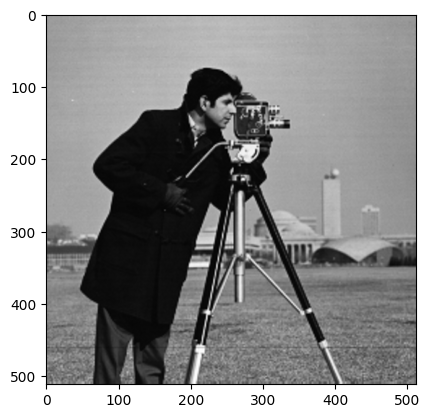

dtype('uint8')

In [42]:
image = cv2.imread("./pics/cameraman.tif") 

plt.imshow(image) 
plt.show()
image.dtype

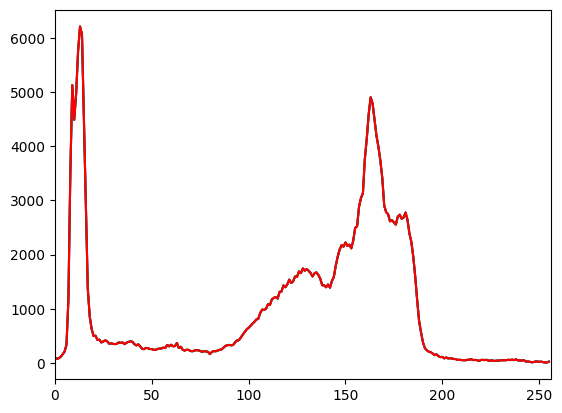

In [22]:
# Histogram plotting of the image 
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
      
    histr = cv2.calcHist([image],  
                         [i], None, 
                         [256],  
                         [0, 256]) 
      
    plt.plot(histr, color = col) 
      
    # Limit X - axis to 256 
    plt.xlim([0, 256]) 
      
plt.show() 

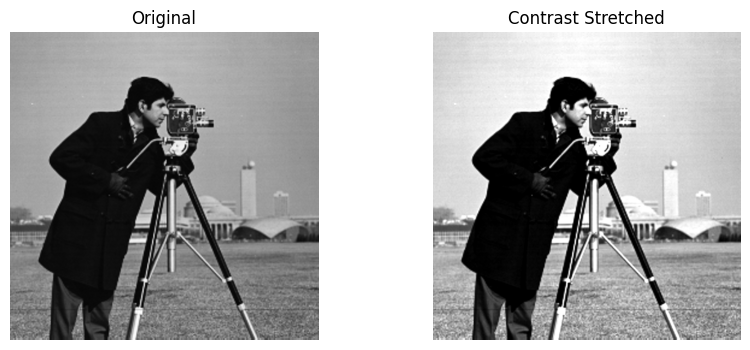

In [30]:
# Apply contrast stretching method 
miniI, maxiI = 80, 150
minoI, maxoI = 100, 200

# Load your uint8 image
# image = cv2.imread('img.png')   # already uint8
image_float = image.astype(np.float32)

# Contrast stretching formula:
# pout = (pin - miniI) * ((maxoI - minoI) / (maxiI - miniI)) + minoI
stretched = (image_float - miniI) * ((maxoI - minoI) / (maxiI - miniI)) + minoI

# Clip to valid range and convert back to uint8
stretched = np.clip(stretched, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Contrast Stretched")
plt.imshow(stretched)
plt.axis("off")

plt.show()

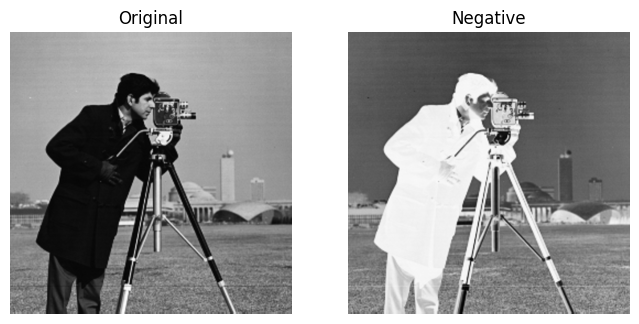

In [43]:
negative = 255 - image

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Negative")
plt.imshow(negative, cmap='gray')
plt.axis("off")

plt.show()

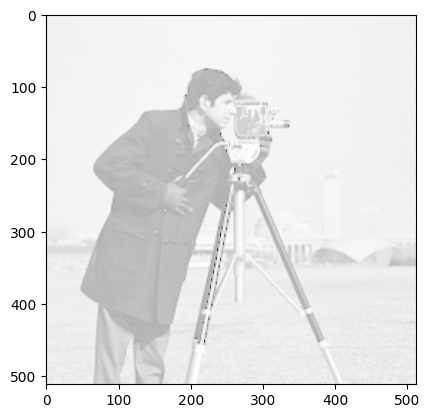

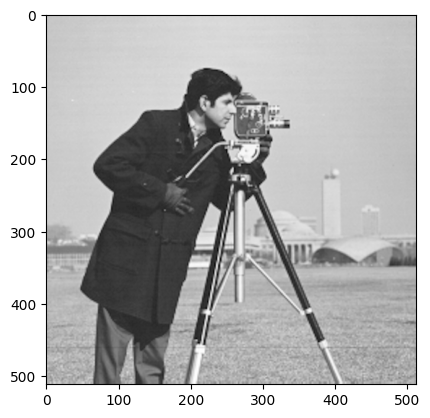

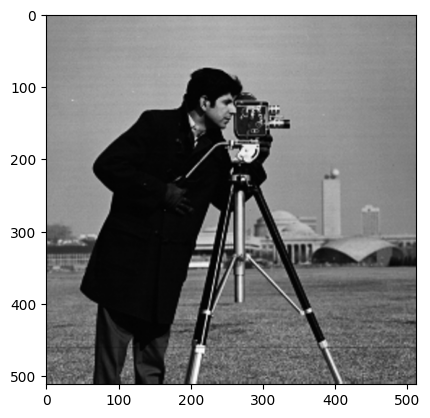

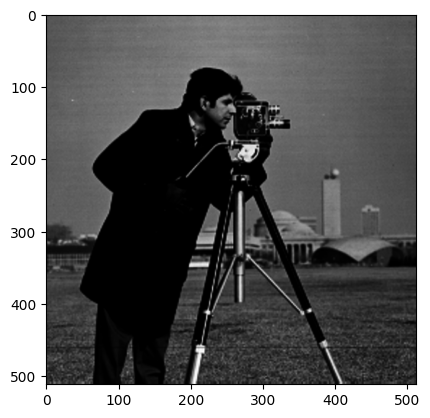

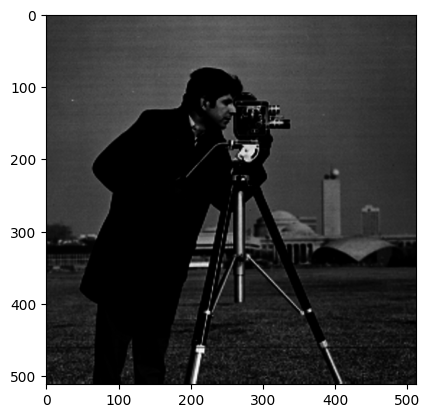

In [44]:
for gamma in [0.1, 0.5, 1.2, 2.2, 3.2]: 

    # Apply gamma correction. 
    gamma_corrected = np.array(255*(image / 255) ** gamma, dtype = 'uint8') 
    plt.imshow(gamma_corrected) 
    plt.show() 

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the grayscale image (updated path)
image_path = r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\Python_Image_Processing_Tasks#2\pics\cameraman.tif"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

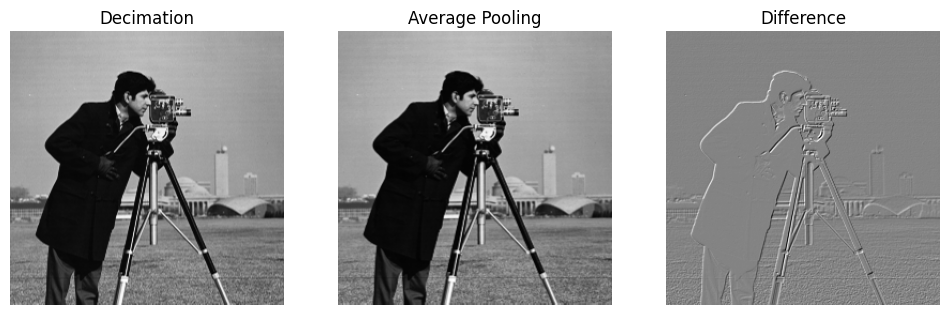

In [ ]:

#  Compare two Down Sampling methods
# Method 1: Decimation (take every 2nd pixel)
decimation = image[::2, ::2]

# Method 2: Average Pooling (2x2 block average)
kernel_size = 2
average_pooling = image.reshape(image.shape[0]//kernel_size, kernel_size,
                                image.shape[1]//kernel_size, kernel_size).mean(axis=(1,3)).astype(np.uint8)

# Difference between the two methods
difference = decimation.astype(int) - average_pooling.astype(int)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Decimation")
plt.imshow(decimation, cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Average Pooling")
plt.imshow(average_pooling, cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Difference")
plt.imshow(difference, cmap='gray')
plt.axis("off")
plt.show()

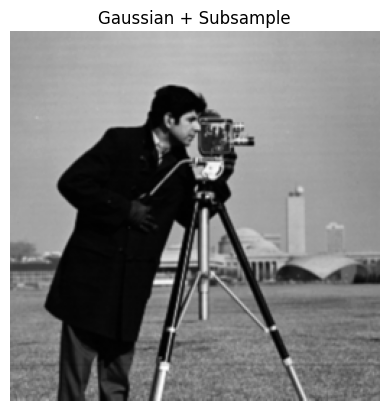

In [ ]:

#  Alternative Down Sampling (Gaussian smoothing + Subsample)
blurred = cv2.GaussianBlur(image, (5,5), 0)
downsample_gaussian = blurred[::2, ::2]

plt.imshow(downsample_gaussian, cmap='gray')
plt.title("Gaussian + Subsample")
plt.axis("off")
plt.show()

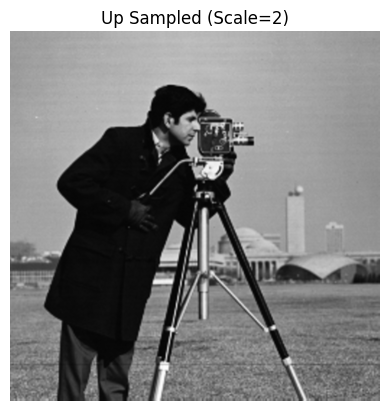

In [ ]:

#  Effect of Scale in Up Sampling
# Scale factor determines the enlargement ratio
upscaled = cv2.resize(image, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
plt.imshow(upscaled, cmap='gray')
plt.title("Up Sampled (Scale=2)")
plt.axis("off")
plt.show()

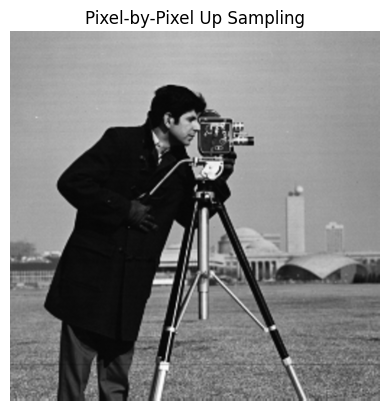

In [ ]:
#  Pixel-by-Pixel Up Sampling
def pixel_upsample(img, scale):
    h, w = img.shape
    up_img = np.zeros((h*scale, w*scale), dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            up_img[i*scale:(i+1)*scale, j*scale:(j+1)*scale] = img[i,j]
    return up_img

up_pixel = pixel_upsample(image, 2)
plt.imshow(up_pixel, cmap='gray')
plt.title("Pixel-by-Pixel Up Sampling")
plt.axis("off")
plt.show()

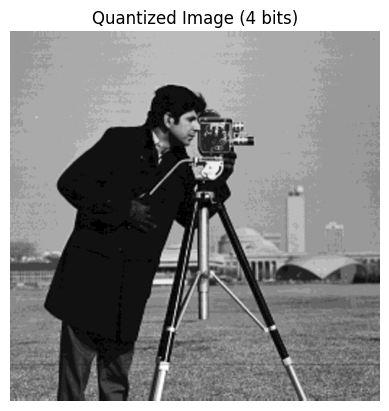

In [ ]:

# Color Quantization for grayscale (e.g., 4-bit)
def quantize_image(img, bits=4):
    levels = 2 ** bits
    q_img = (img / 255 * (levels-1)).round() * (255/(levels-1))
    return q_img.astype(np.uint8)

quantized = quantize_image(image, bits=4)
plt.imshow(quantized, cmap='gray')
plt.title("Quantized Image (4 bits)")
plt.axis("off")
plt.show()